In [1]:
import os
from pathlib import Path
from functools import partial

import matplotlib.pyplot as plt

from src.datasets.cookie_ad import CookieAD
from src.preprocessing import InferencePreprocessing

In [2]:
cookie_dataset = partial(
    CookieAD,
    dataset_dir=Path(os.environ["COOKIE_DATASET_DIR"]),
    in_memory=False,
    sample_transform=InferencePreprocessing(
        target_img_width=int(os.environ["IMAGE_WIDTH"]),
        target_img_height=int(os.environ["IMAGE_HEIGHT"]),
    ),
)

ds_train = cookie_dataset(training_set=True)
ds_test = cookie_dataset(training_set=False)

print(f"Train Length: {len(ds_train)}")
print(f"Test Length: {len(ds_test)}")
print(f"Image Shape: {ds_train[0][0].shape}")


Train Length: 176
Test Length: 88
Image Shape: torch.Size([1, 128, 128])


torch.Size([1, 128, 128])
tensor(0)


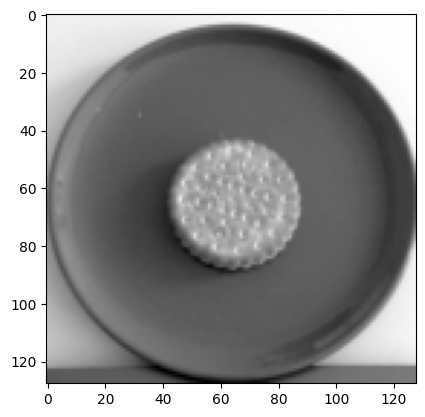

In [3]:
image, label = ds_test[0]
plt.imshow(image.movedim(0, -1), cmap="gray")
print(image.shape)
print(label)